## modeling with AutoML

In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import interpolate
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'

In [2]:
forecast_weather = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_forecast_weather.csv')
solar = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_power_2204.csv')
real_weather = pd.read_csv('../../Data/capstone/total_eda_real.csv')
solar_2 = pd.read_csv('../../Data/capstone/발전소/하동_eda.csv')

In [3]:
def time_change(data, Forecast_time):
    """
    data = forecast가 있는 데이터
    Forecast_time = 예보시간

    return = 예보시간을 기준으로 데이터를 정렬한 데이터
    """
    data[Forecast_time] = pd.to_datetime(data[Forecast_time])
    data['real_time'] = data.apply(lambda row: row['Forecast time'] + datetime.timedelta(hours=row['forecast']), axis=1)
    forecast_weather_eda = data.groupby(['real_time']).mean().drop('forecast', axis=1)
    forecast_weather_eda.reset_index(inplace=True)
    return forecast_weather_eda

In [4]:
eda_forecast = time_change(forecast_weather, 'Forecast time')

C:\Users\user\AppData\Local\Temp\ipykernel_7372\2365867269.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  forecast_weather_eda = data.groupby(['real_time']).mean().drop('forecast', axis=1)


In [5]:
eda_forecast

,real_time,temperature,humidity,windspeed,winddirection
0,2020-09-01 15:00:00,31.0,65.000000,3.00,101.000000
1,2020-09-01 18:00:00,29.0,80.000000,2.40,90.000000
2,2020-09-01 21:00:00,26.0,90.000000,1.80,66.333333
3,2020-09-02 00:00:00,25.5,90.000000,1.75,48.000000
4,2020-09-02 03:00:00,25.0,90.000000,1.90,44.200000
...,...,...,...,...,...
11236,2022-07-03 20:00:00,26.0,80.000000,2.50,78.000000
11237,2022-07-03 21:00:00,26.0,81.666667,2.10,76.000000
11238,2022-07-03 22:00:00,25.0,85.000000,1.70,65.000000
11239,2022-07-03 23:00:00,25.0,85.000000,1.60,43.000000


In [6]:
solar['datetime'] = pd.to_datetime(solar['datetime'])
solar.target.replace(65535.0, solar.target.mean(), inplace=True)
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day
solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()
solar_eda['date'] = pd.to_datetime(solar_eda[['year', 'month', 'day', 'hour']])

C:\Users\user\AppData\Local\Temp\ipykernel_7372\108906182.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()


In [7]:
solar_eda.dropna()

,year,month,day,hour,target,date
11,2020,9,10,11,733.260000,2020-09-10 11:00:00
12,2020,9,10,12,645.433333,2020-09-10 12:00:00
13,2020,9,10,13,605.308333,2020-09-10 13:00:00
14,2020,9,10,14,665.733333,2020-09-10 14:00:00
15,2020,9,10,15,522.251667,2020-09-10 15:00:00
...,...,...,...,...,...,...
14347,2022,4,30,19,0.850000,2022-04-30 19:00:00
14348,2022,4,30,20,0.000000,2022-04-30 20:00:00
14349,2022,4,30,21,0.000000,2022-04-30 21:00:00
14350,2022,4,30,22,0.000000,2022-04-30 22:00:00


In [8]:
incheon = real_weather[real_weather['지점명'] =='인천']

In [9]:
eda_weather = incheon.drop(['지점', '지점명'], axis=1)

In [10]:
eda_weather['일시'] = pd.to_datetime(eda_weather['일시'])

In [11]:
eda_weather['hour'] = eda_weather['일시'].dt.hour
eda_weather['month'] = eda_weather['일시'].dt.month
eda_weather['year'] = eda_weather['일시'].dt.year

eda_weather.drop(['위도','경도'], axis=1, inplace=True)

In [12]:
eda_weather

,위도,경도,일시,기온,풍속,풍향,습도,강수량,hour,month,year
209952,37.4777,126.6249,2021-01-01 00:00:00,-7.5,2.0,20.0,62.0,0.0,0,1,2021
209953,37.4777,126.6249,2021-01-01 01:00:00,-7.8,1.9,50.0,63.0,0.0,1,1,2021
209954,37.4777,126.6249,2021-01-01 02:00:00,-7.8,1.0,20.0,61.0,0.0,2,1,2021
209955,37.4777,126.6249,2021-01-01 03:00:00,-8.0,1.9,50.0,60.0,0.0,3,1,2021
209956,37.4777,126.6249,2021-01-01 04:00:00,-7.9,1.9,70.0,58.0,0.0,4,1,2021
...,...,...,...,...,...,...,...,...,...,...,...
227443,37.4777,126.6249,2022-12-30 20:00:00,-2.6,3.0,320.0,63.0,0.0,20,12,2022
227444,37.4777,126.6249,2022-12-30 21:00:00,-2.9,3.0,320.0,66.0,0.0,21,12,2022
227445,37.4777,126.6249,2022-12-30 22:00:00,-3.4,2.1,360.0,67.0,0.0,22,12,2022
227446,37.4777,126.6249,2022-12-30 23:00:00,-3.6,2.2,320.0,67.0,0.0,23,12,2022


In [13]:
eda_weather.set_index('일시', inplace=True)

In [14]:
eda_weather

,위도,경도,기온,풍속,풍향,습도,강수량,hour,month,year
일시,,,,,,,,,,
2021-01-01 00:00:00,37.4777,126.6249,-7.5,2.0,20.0,62.0,0.0,0,1,2021
2021-01-01 01:00:00,37.4777,126.6249,-7.8,1.9,50.0,63.0,0.0,1,1,2021
2021-01-01 02:00:00,37.4777,126.6249,-7.8,1.0,20.0,61.0,0.0,2,1,2021
2021-01-01 03:00:00,37.4777,126.6249,-8.0,1.9,50.0,60.0,0.0,3,1,2021
2021-01-01 04:00:00,37.4777,126.6249,-7.9,1.9,70.0,58.0,0.0,4,1,2021
...,...,...,...,...,...,...,...,...,...,...
2022-12-30 20:00:00,37.4777,126.6249,-2.6,3.0,320.0,63.0,0.0,20,12,2022
2022-12-30 21:00:00,37.4777,126.6249,-2.9,3.0,320.0,66.0,0.0,21,12,2022
2022-12-30 22:00:00,37.4777,126.6249,-3.4,2.1,360.0,67.0,0.0,22,12,2022


In [15]:
solar_eda.set_index('date', inplace=True)

In [16]:
total_time = pd.date_range(start='2021-01-01 00:00:00', end='2022-04-30 23:00:00', freq='H')

In [17]:
total_time

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2022-04-30 14:00:00', '2022-04-30 15:00:00',
               '2022-04-30 16:00:00', '2022-04-30 17:00:00',
               '2022-04-30 18:00:00', '2022-04-30 19:00:00',
               '2022-04-30 20:00:00', '2022-04-30 21:00:00',
               '2022-04-30 22:00:00', '2022-04-30 23:00:00'],
              dtype='datetime64[ns]', length=11640, freq='H')

y = solar_eda.loc[total_time].target

In [18]:
solar_2.date = pd.to_datetime(solar_2.date)

In [19]:
solar_2.set_index('date', inplace=True)

In [20]:
y = solar_2.loc[total_time].value

In [21]:
eda_weather.drop(['위도', '경도'], axis=1, inplace=True)

In [22]:
x = eda_weather.loc['2021-01-01 00:00:00' : '2022-04-30 23:00:00']

In [23]:
comm = y.index.intersection(x.index)

In [24]:
comm_2 = x.index.intersection(y.index)

In [25]:
x = x.loc[comm]

In [26]:
y = y.loc[comm]

In [27]:
x = x.loc[comm_2]
y = y.loc[comm_2]

In [28]:
y_input = y.loc[('2022-01-14 00:00:00' > y.index) | (y.index > '2022-01-17 23:00:00')]

In [29]:
x_input = x.loc[('2022-01-14 00:00:00' > x.index) | (x.index > '2022-01-17 23:00:00')]

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [31]:
sc = StandardScaler()

In [32]:
mn = MinMaxScaler()

In [33]:
slice = 8760

In [34]:
x_train = x_input.iloc[:slice]
x_test = x_input.iloc[slice:]
y_train = y_input.iloc[:slice]
y_test = y_input.iloc[slice:]

In [35]:
mn.fit(x_train)

MinMaxScaler()

In [36]:
sc_x_train = mn.transform(x_train)
sc_x_test = mn.transform(x_test)

In [37]:
mn.fit(y_train.values.reshape(-1,1))

MinMaxScaler()

In [38]:
sc_y_train = mn.transform(y_train.values.reshape(-1,1)).reshape(-1)
sc_y_test = mn.transform(y_test.values.reshape(-1,1))

In [39]:
print(len(sc_x_train), len(sc_x_test), len(sc_y_train), len(sc_y_test))

8760 2783 8760 2783


In [40]:
from pycaret.regression import *

In [41]:
reg = setup(data = sc_x_train, 
            target = sc_y_train,
            fold=5)

,Description,Value
0,Session id,2783
1,Target,target
2,Target type,Regression
3,Original data shape,"(8760, 9)"
4,Transformed data shape,"(8760, 9)"
5,Transformed train set shape,"(6132, 9)"
6,Transformed test set shape,"(2628, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [42]:
best_model = compare_models(sort='RMSE', n_select=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0611,0.0127,0.1125,0.8296,0.0822,2.7583,0.8500
rf,Random Forest Regressor,0.0585,0.0131,0.1144,0.8237,0.0835,1.8952,0.9620
et,Extra Trees Regressor,0.0600,0.0140,0.1183,0.8117,0.0860,1.9208,0.9080
gbr,Gradient Boosting Regressor,0.0751,0.0153,0.1235,0.7946,0.0910,3.8016,0.9060
knn,K Neighbors Regressor,0.0713,0.0168,0.1297,0.7737,0.0955,4.6474,0.8300
ada,AdaBoost Regressor,0.0830,0.0194,0.1390,0.7401,0.0991,3.2939,0.8340
dt,Decision Tree Regressor,0.0718,0.0244,0.1560,0.6724,0.1134,2.5779,0.8300
lar,Least Angle Regression,0.1932,0.0610,0.2469,0.1803,0.1872,15.9026,0.8340
br,Bayesian Ridge,0.1932,0.0610,0.2469,0.1804,0.1873,15.9116,0.8220
ridge,Ridge Regression,0.1932,0.0610,0.2469,0.1804,0.1872,15.9097,0.8560


In [43]:
model_results = pull()

In [44]:
model_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0611,0.0127,0.1125,0.8296,0.0822,2.7583,0.850
rf,Random Forest Regressor,0.0585,0.0131,0.1144,0.8237,0.0835,1.8952,0.962
et,Extra Trees Regressor,0.0600,0.0140,0.1183,0.8117,0.0860,1.9208,0.908
gbr,Gradient Boosting Regressor,0.0751,0.0153,0.1235,0.7946,0.0910,3.8016,0.906
knn,K Neighbors Regressor,0.0713,0.0168,0.1297,0.7737,0.0955,4.6474,0.830
ada,AdaBoost Regressor,0.0830,0.0194,0.1390,0.7401,0.0991,3.2939,0.834
dt,Decision Tree Regressor,0.0718,0.0244,0.1560,0.6724,0.1134,2.5779,0.830
lar,Least Angle Regression,0.1932,0.0610,0.2469,0.1803,0.1872,15.9026,0.834
br,Bayesian Ridge,0.1932,0.0610,0.2469,0.1804,0.1873,15.9116,0.822
ridge,Ridge Regression,0.1932,0.0610,0.2469,0.1804,0.1872,15.9097,0.856


In [45]:
best_model

[LGBMRegressor(random_state=2783),
 RandomForestRegressor(n_jobs=-1, random_state=2783),
 ExtraTreesRegressor(n_jobs=-1, random_state=2783),
 GradientBoostingRegressor(random_state=2783),
 KNeighborsRegressor(n_jobs=-1),
 AdaBoostRegressor(random_state=2783),
 DecisionTreeRegressor(random_state=2783),
 Lars(random_state=2783),
 BayesianRidge(),
 Ridge(random_state=2783)]

In [46]:
lgbr = create_model('lightgbm')
rf = create_model('rf')
extra = create_model('et')
gradient = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0631,0.0139,0.1181,0.8221,0.0860,5.1665
1,0.0601,0.0124,0.1115,0.8293,0.0817,2.5084
2,0.0631,0.0130,0.1140,0.8301,0.0824,2.1102
3,0.0572,0.0109,0.1044,0.8513,0.0765,1.5299
4,0.0621,0.0131,0.1146,0.8151,0.0846,2.4766
Mean,0.0611,0.0127,0.1125,0.8296,0.0822,2.7583
Std,0.0022,0.0010,0.0046,0.0121,0.0032,1.2546


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0618,0.0146,0.1210,0.8134,0.0879,3.8837
1,0.0564,0.0123,0.1109,0.8313,0.0809,1.1861
2,0.0587,0.0130,0.1142,0.8297,0.0823,1.3872
3,0.0552,0.0116,0.1079,0.8412,0.0790,1.9447
4,0.0605,0.0140,0.1183,0.8031,0.0872,1.0744
Mean,0.0585,0.0131,0.1144,0.8237,0.0835,1.8952
Std,0.0024,0.0011,0.0048,0.0137,0.0035,1.0384


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0637,0.0154,0.1243,0.8031,0.0903,3.7018
1,0.0578,0.0132,0.1149,0.8189,0.0836,1.2695
2,0.0612,0.0142,0.1190,0.8150,0.0853,1.3686
3,0.0570,0.0128,0.1133,0.8248,0.0825,2.1105
4,0.0601,0.0144,0.1202,0.7968,0.0884,1.1535
Mean,0.0600,0.0140,0.1183,0.8117,0.0860,1.9208
Std,0.0024,0.0009,0.0039,0.0103,0.0029,0.9514


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0783,0.0166,0.1287,0.7888,0.0946,5.4128
1,0.0753,0.0151,0.1229,0.7927,0.0906,4.8947
2,0.0743,0.0144,0.1201,0.8117,0.0877,2.9817
3,0.0721,0.0144,0.1199,0.8038,0.0886,2.5884
4,0.0756,0.0159,0.1261,0.7763,0.0934,3.1301
Mean,0.0751,0.0153,0.1235,0.7946,0.0910,3.8016
Std,0.0020,0.0008,0.0034,0.0123,0.0027,1.1301


In [47]:
lgbr_best = tune_model(lgbr)
rf_best = tune_model(rf)
extra_best = tune_model(extra)
gradient_best = tune_model(gradient)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0777,0.0165,0.1283,0.7900,0.0935,6.4220
1,0.0739,0.0158,0.1257,0.7833,0.0916,3.8947
2,0.0741,0.0155,0.1244,0.7978,0.0894,3.1374
3,0.0728,0.0150,0.1223,0.7958,0.0890,2.4146
4,0.0773,0.0169,0.1298,0.7628,0.0954,3.6320
Mean,0.0752,0.0159,0.1261,0.7859,0.0918,3.9001
Std,0.0020,0.0007,0.0027,0.0126,0.0024,1.3580


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0967,0.0207,0.1440,0.7354,0.1023,5.9008
1,0.0956,0.0199,0.1412,0.7265,0.1018,8.6924
2,0.0945,0.0198,0.1408,0.7411,0.1003,6.5823
3,0.0945,0.0188,0.1372,0.7431,0.0992,4.9157
4,0.0977,0.0206,0.1436,0.7096,0.1050,7.1281
Mean,0.0958,0.0200,0.1414,0.7311,0.1017,6.6439
Std,0.0012,0.0007,0.0024,0.0122,0.0020,1.2628


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1585,0.0417,0.2042,0.4680,0.1485,12.4885
1,0.1506,0.0373,0.1931,0.4887,0.1421,16.5017
2,0.1550,0.0392,0.1980,0.4877,0.1448,13.3095
3,0.1542,0.0378,0.1944,0.4846,0.1439,10.0834
4,0.1560,0.0387,0.1966,0.4559,0.1465,14.2854
Mean,0.1549,0.0389,0.1973,0.4770,0.1452,13.3337
Std,0.0026,0.0015,0.0039,0.0129,0.0022,2.1081


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0708,0.0146,0.1207,0.8141,0.0881,3.6772
1,0.0666,0.0129,0.1137,0.8228,0.0836,3.5000
2,0.0673,0.0130,0.1141,0.8300,0.0825,2.4652
3,0.0634,0.0118,0.1088,0.8383,0.0796,1.7157
4,0.0685,0.0137,0.1169,0.8078,0.0867,3.5299
Mean,0.0673,0.0132,0.1148,0.8226,0.0841,2.9776
Std,0.0024,0.0009,0.0039,0.0109,0.0030,0.7645


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [48]:
model_list = [lgbr_best, rf_best, extra_best, gradient_best]

In [49]:
blended = blend_models(estimator_list = model_list,
                       fold = 5,
                       optimize='MSE',
                       )

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0636,0.0140,0.1185,0.8210,0.0862,4.0514
1,0.0585,0.0121,0.1101,0.8337,0.0804,1.9818
2,0.0610,0.0127,0.1126,0.8344,0.0811,1.7093
3,0.0559,0.0112,0.1057,0.8477,0.0772,1.7383
4,0.0612,0.0132,0.1148,0.8144,0.0847,1.7264
Mean,0.0600,0.0126,0.1123,0.8302,0.0819,2.2414
Std,0.0026,0.0010,0.0043,0.0116,0.0032,0.9105


In [50]:
final_model = finalize_model(blended)

In [51]:
import pickle

pickle.dump(final_model, open('./finalize_model.pkl', 'wb'))

In [52]:
final_model

Pipeline(memory=FastMemory(location=C:\Users\user\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['feature_1', 'feature_2',
                                             'feature_3', 'feature_4',
                                             'feature_5', 'feature_6',
                                             'feature_7', 'feature_8'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='m...
                                              RandomForestRegressor(n_jobs=-1,
                                                                    random_state=2783)),
                                             ('Extra Trees Regressor',
                                              ExtraTreesRegressor(n_jobs=-1,
                                                                  random_state=2783)),
                                             ('Gradient Boosting Regressor',
                                              GradientBoostingRegressor(learning_rate=0.05,
                                                                        max_depth=7,
                                                                        max_features='sqrt',
                                                                        min_impurity_decrease=0.0002,
                                                                        min_samples_leaf=5,
                                                                        min_samples_split=5,
                                                                        n_estimators=220,
                                                                        random_state=2783,
                                                                        subsample=0.55))],
                                 n_jobs=-1))])

In [53]:
predict_model(final_model)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target,prediction_label
7114,0.611650,0.120968,0.388889,0.436782,0.0,0.434783,0.818182,0.0,0.589644,0.563899
1710,0.433010,0.241935,0.055556,0.770115,0.0,0.260870,0.181818,0.0,0.000000,0.002185
5185,0.850485,0.096774,0.694444,0.816092,0.0,0.043478,0.636364,0.0,0.000000,0.000237
3684,0.757282,0.250000,0.638889,0.528736,0.0,0.521739,0.454545,0.0,0.083278,0.409701
7853,0.337864,0.024194,0.000000,0.425287,0.0,0.217391,0.909091,0.0,0.000000,0.007727
...,...,...,...,...,...,...,...,...,...,...
1270,0.359223,0.354839,1.000000,0.344828,0.0,0.956522,0.090909,0.0,0.000000,-0.001432
199,0.058252,0.354839,0.055556,0.333333,0.0,0.304348,0.000000,0.0,0.000000,0.006365
4957,0.966990,0.250000,0.694444,0.344828,0.0,0.565217,0.545455,0.0,0.836556,0.792199
2303,0.547573,0.298387,0.805556,0.574713,0.0,1.000000,0.272727,0.0,0.000000,0.003059


In [54]:
pd.DataFrame(sc_x_test)

,0,1,2,3,4,5,6,7
0,0.182524,0.072581,0.944444,0.379310,0.0,0.043478,0.000000,1.0
1,0.182524,0.024194,0.000000,0.413793,0.0,0.086957,0.000000,1.0
2,0.190291,0.120968,0.944444,0.402299,0.0,0.130435,0.000000,1.0
3,0.190291,0.153226,0.888889,0.402299,0.0,0.173913,0.000000,1.0
4,0.192233,0.145161,0.055556,0.413793,0.0,0.217391,0.000000,1.0
...,...,...,...,...,...,...,...,...
2778,0.559223,0.250000,0.694444,0.781609,0.0,0.826087,0.272727,1.0
2779,0.549515,0.274194,0.750000,0.804598,0.0,0.869565,0.272727,1.0
2780,0.547573,0.193548,0.750000,0.850575,0.0,0.913043,0.272727,1.0
2781,0.547573,0.217742,0.750000,0.850575,0.0,0.956522,0.272727,1.0


In [55]:
final_result = predict_model(final_model, data=pd.DataFrame(sc_x_test, columns=['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8']))

In [56]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [57]:
final_result.prediction_label

0       0.000279
1      -0.003607
2       0.004795
3       0.003608
4      -0.004036
          ...   
2778    0.023180
2779    0.004849
2780    0.002720
2781    0.004389
2782    0.003800
Name: prediction_label, Length: 2783, dtype: float64

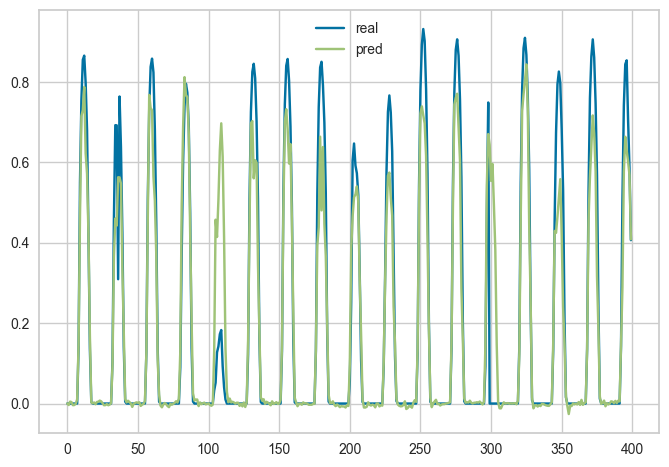

In [58]:
plt.plot(sc_y_test[:400], label='real')
plt.plot(final_result.prediction_label[:400], label='pred')
plt.legend()
plt.show()

In [59]:
inver = mn.inverse_transform(final_result.prediction_label.values.reshape(-1,1))

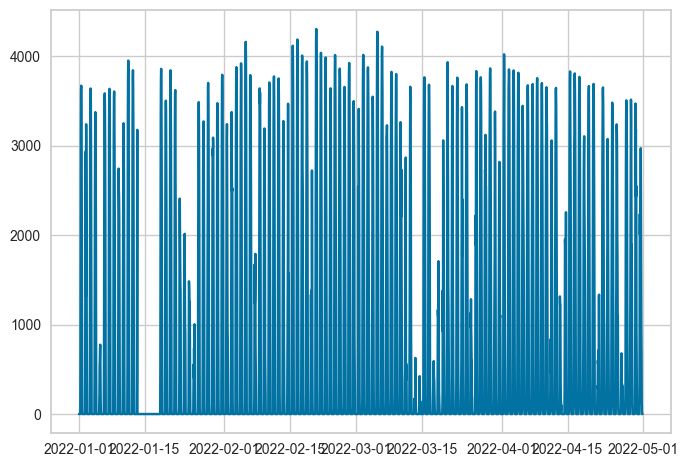

In [60]:
plt.plot(y_test)

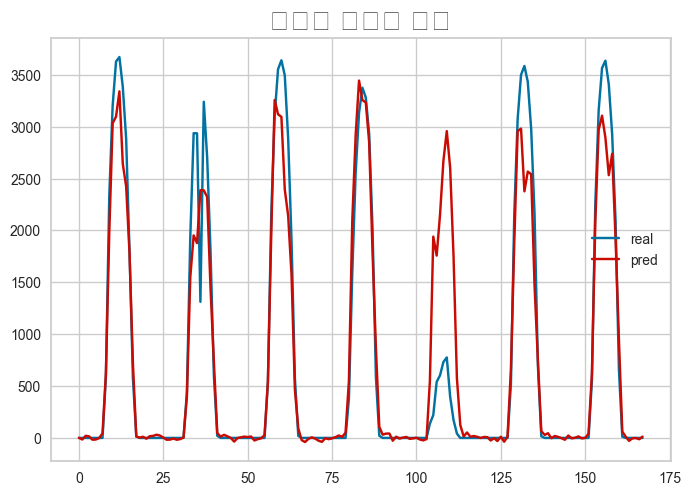

In [61]:
plt.plot(range(168), y_test[:168], label='real', color = 'b')
plt.plot(inver[:168], label='pred', color = 'r')
plt.legend()
plt.title('태양광 발전량 예측', fontsize = 20)
plt.show()

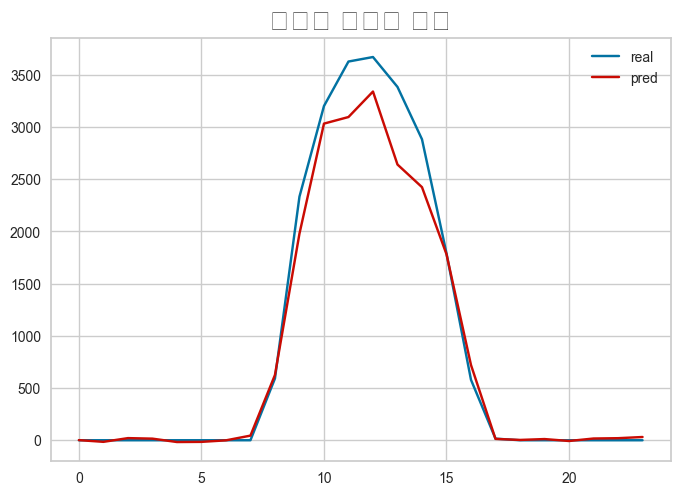

In [62]:
plt.plot(range(24), y_test[:24], label='real', color = 'b')
plt.plot(inver[:24], label='pred', color = 'r')
plt.legend()
plt.title('태양광 발전량 예측', fontsize = 20)
plt.show()

In [63]:
lig_result = predict_model(lgbr_best).sort_index()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0586,0.0119,0.1089,0.8404,0.0808,2.5135


In [64]:
evaluate_model(lgbr_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [65]:
lig_result

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target,prediction_label
2,0.188350,0.080645,0.055556,0.586207,0.0,0.086957,0.0,0.0,0.000000,-0.004283
6,0.194175,0.080645,0.444444,0.563218,0.0,0.260870,0.0,0.0,0.000000,-0.004621
11,0.297087,0.185484,0.444444,0.448276,0.0,0.478261,0.0,0.0,0.612940,0.510630
15,0.355340,0.161290,0.638889,0.574713,0.0,0.652174,0.0,0.0,0.379138,0.468372
17,0.332039,0.080645,0.638889,0.689655,0.0,0.739130,0.0,0.0,0.065359,0.109076
...,...,...,...,...,...,...,...,...,...,...
8736,0.248544,0.677419,0.944444,0.356322,0.0,0.000000,1.0,0.0,0.000000,0.005625
8739,0.219417,0.580645,0.888889,0.356322,0.0,0.130435,1.0,0.0,0.000000,0.002683
8740,0.211650,0.516129,0.888889,0.333333,0.0,0.173913,1.0,0.0,0.000000,-0.007552
8755,0.234951,0.403226,0.888889,0.229885,0.0,0.826087,1.0,0.0,0.000000,0.028299


lig_result[['target','prediction_label']].iloc[250:300,:].plot()